In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import random
from datetime import datetime
import re 
# from textblob import TextBlob
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os # accessing directory structure
from scipy import stats

#stuff from nltk
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize #<- For finding tokens (small divisions) from a large sample of text
from nltk.corpus import stopwords #<- For calling the know stopwords in english (e.g, articles, connectors)
from nltk.corpus import wordnet #<- For calling a lexical database in eglish with meanings, synonyms, antonyms, and more 
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentAnalyzer

#### Reading in data and selecting only 4 columns to work with.
#### Please use this dataset https://www.kaggle.com/nickreinerink/reddit-rcryptocurrency

In [2]:
#this is for working on local downloaded files on my computer:
# data_dir = "../input/reddit-rcryptocurrency/"
# print(os.listdir('../input/reddit-rcryptocurrency/'))
# list_sorted = sorted((os.listdir('../input/reddit-rcryptocurrency/')))
# list_sorted
# # a = ["2017-11", "2017-12", "2018-01", "2018-02", "2018-03"]
# dt_cols = {"author": str, "body": str, "created_utc": str, "score": float}
# data = [t+'.csv' for t in a]
# df1 = pd.concat([pd.read_csv(dataset, usecols=dt_cols, dtype=dt_cols) for dataset in data], ignore_index=True)

a = ["2017-11", "2017-12", "2018-01", "2018-02", "2018-03"]
data = [t+'.csv' for t in a]
dt_cols = {"author": str, "body": str, "created_utc": str, "score": float}
df = pd.concat([pd.read_csv(dataset, usecols=dt_cols, dtype=dt_cols) for dataset in data], ignore_index=True)
df.sort_values(by = 'created_utc')
df.dropna(how='any')


########## FOR KAGGLE

# df2 = pd.read_csv('../input/2017-12.csv', delimiter=',', nrows = nRowsRead)

# df
# data_dir = "../input/reddit-rcryptocurrency/"
# datasets = {"%s%s.csv" % (data_dir, t) for t in ["2017-11", "2017-12", "2018-01", "2018-02", "2018-03"]}
# dt_cols = {"author": str, "body": str, "created_utc": str, "score": float}
# df= pd.concat([pd.read_csv(dataset, usecols=dt_cols, dtype=dt_cols) for dataset in datasets], ignore_index=True)
# df

,author,body,created_utc,score
0,ShytTalkingScrub,Because I sold it,1509494409,10.0
1,Threat-Level-Midnite,They probably just airdropped tokens into your...,1509494480,1.0
2,e_x_p,soon since $5000,1509494514,0.0
3,DuplicatesBot,Here is a list of threads in other subreddits ...,1509494526,1.0
4,Threat-Level-Midnite,MEW is only set up for ERC20 tokens so make su...,1509494583,1.0
...,...,...,...,...
2160623,Bigvardaddy,I'm studying thermo-physics thanks bud,1522540738,1.0
2160624,[deleted],[removed],1522540747,1.0
2160625,radarmike,So. Sell 10k ZIL for some Matrix Ai Network. Z...,1522540767,1.0
2160626,arsonbunny,"I ever said anywhere its ""dooms day"". Lots of...",1522540774,1.0


In [3]:
# #dropping NaN's
# df_unsorted.dropna(how='any')

# df = df_unsorted.sort_values(by = 'created_utc', ascending = True)
# # df.sort_values(by = 'created_utc', ascending = True)

# df


In [4]:
df = df.dropna(how='any')
df.sort_values(by = 'created_utc', ascending = True)


,author,body,created_utc,score
0,ShytTalkingScrub,Because I sold it,1509494409,10.0
1,Threat-Level-Midnite,They probably just airdropped tokens into your...,1509494480,1.0
2,e_x_p,soon since $5000,1509494514,0.0
3,DuplicatesBot,Here is a list of threads in other subreddits ...,1509494526,1.0
4,Threat-Level-Midnite,MEW is only set up for ERC20 tokens so make su...,1509494583,1.0
...,...,...,...,...
2160623,Bigvardaddy,I'm studying thermo-physics thanks bud,1522540738,1.0
2160624,[deleted],[removed],1522540747,1.0
2160625,radarmike,So. Sell 10k ZIL for some Matrix Ai Network. Z...,1522540767,1.0
2160626,arsonbunny,"I ever said anywhere its ""dooms day"". Lots of...",1522540774,1.0


#### Converting UTC to date-time, to bin sentiment by day later

In [5]:
from datetime import datetime

# df['created_utc']

df['created_utc'] = df['created_utc'].astype(int)

x = df['created_utc']

datetime = []
for num in x:
    y = pd.Timestamp(num, unit='s')
    datetime.append(y)
    
df['date'] = datetime
df.sort_values(by = 'date', ascending = True)

,author,body,created_utc,score,date
0,ShytTalkingScrub,Because I sold it,1509494409,10.0,2017-11-01 00:00:09
1,Threat-Level-Midnite,They probably just airdropped tokens into your...,1509494480,1.0,2017-11-01 00:01:20
2,e_x_p,soon since $5000,1509494514,0.0,2017-11-01 00:01:54
3,DuplicatesBot,Here is a list of threads in other subreddits ...,1509494526,1.0,2017-11-01 00:02:06
4,Threat-Level-Midnite,MEW is only set up for ERC20 tokens so make su...,1509494583,1.0,2017-11-01 00:03:03
...,...,...,...,...,...
2160623,Bigvardaddy,I'm studying thermo-physics thanks bud,1522540738,1.0,2018-03-31 23:58:58
2160624,[deleted],[removed],1522540747,1.0,2018-03-31 23:59:07
2160625,radarmike,So. Sell 10k ZIL for some Matrix Ai Network. Z...,1522540767,1.0,2018-03-31 23:59:27
2160626,arsonbunny,"I ever said anywhere its ""dooms day"". Lots of...",1522540774,1.0,2018-03-31 23:59:34


In [6]:
df_small = df.sample(n=1000000, random_state = np.random.RandomState(42))
df_small.sort_values(by = 'created_utc')

,author,body,created_utc,score,date
0,ShytTalkingScrub,Because I sold it,1509494409,10.0,2017-11-01 00:00:09
2,e_x_p,soon since $5000,1509494514,0.0,2017-11-01 00:01:54
3,DuplicatesBot,Here is a list of threads in other subreddits ...,1509494526,1.0,2017-11-01 00:02:06
5,CorrectDrop,"yeah me as well, we are the whales.",1509494607,2.0,2017-11-01 00:03:27
7,staythepath,Nothing is guaranteed to rise. You are playing...,1509494620,2.0,2017-11-01 00:03:40
...,...,...,...,...,...
2160618,datbackup,Guys are you telling me if I wanna get rich pu...,1522540704,1.0,2018-03-31 23:58:24
2160621,[deleted],[removed],1522540713,1.0,2018-03-31 23:58:33
2160622,ProgrammaticallyHip,Valid point. It's hard not to throw up a warni...,1522540721,1.0,2018-03-31 23:58:41
2160623,Bigvardaddy,I'm studying thermo-physics thanks bud,1522540738,1.0,2018-03-31 23:58:58


In [7]:
# conf_apply_stemming = True
# conf_apply_lemmatizing = True
# conf_to_lower_case = True




w_tokenizer = WhitespaceTokenizer()
lem = WordNetLemmatizer()
stem = nltk.stem.porter.PorterStemmer()
stop = stopwords

def tokenize(text):
    res = ""
    for w in w_tokenizer.tokenize(text):
#         w = stop(w)
#         if conf_apply_lemmatizing:
        w = lem.lemmatize(w)
#         if conf_apply_stemming:
        w = stem.stem(w)
#         if conf_to_lower_case:
        w = w.lower()
        
        res += w + " "
    return res.strip()



df_small["optimized_body"] = df_small["body"].apply(tokenize)
df_small

,author,body,created_utc,score,date,optimized_body
973181,lostnfoundaround,"NEO is one of the coolest coins, it is great s...",1516153604,1.0,2018-01-17 01:46:44,"neo is one of the coolest coins, it is great s..."
1885055,wbted23,I know - which is why it is a great short to m...,1520368718,1.0,2018-03-06 20:38:38,i know - which is whi it is a great short to m...
1903703,CryptoFacts,"Why would Karpeles just keep holding his 165,0...",1520475176,1.0,2018-03-08 02:12:56,"whi would karpel just keep hold hi 165,000 bit..."
879143,SeekingTheta,binance.,1515854208,1.0,2018-01-13 14:36:48,binance.
378550,AgregiouslyTall,What do you mean to early to tell?\n\nIt's not...,1513936316,1.0,2017-12-22 09:51:56,what do you mean to earli to tell? it' not sna...
...,...,...,...,...,...,...
234183,Passthepogs,Is Coinbase a wallet? \n\nI keep my money ther...,1512809913,1.0,2017-12-09 08:58:33,is coinbas a wallet? i keep my money there and...
679346,shufflepucker,**WORD** lol,1515241279,1.0,2018-01-06 12:21:19,**word** lol
788823,replicant__3,thank god your movements and most of those on ...,1515563917,1.0,2018-01-10 05:58:37,thank god your movement and most of those on t...
936150,OrthodoxAtheist,"Fad indeed, just like the rock n' roll, the wa...",1516077891,1.0,2018-01-16 04:44:51,"fad indeed, just like the rock n' roll, the wa..."


### Working on smaller dataset for speed
Number of entries for n=20000 is roughly 1% of entire dataset, We do some basic cleaning and dropping of unneccesary info.



In [8]:
# df_small = df

# df_small = df.sample(n=2160605, random_state = np.random.RandomState(42))
# df_small.sort_values(by = 'created_utc')

# df_small
#work on copy of text body
# This is stuff not fully done, still work in progress but decided to keep

# body_data = df_small[['body','date']].copy()

# body_data.body =body_data.body.str.lower()
# body_data

##### using this to look up http mentions show 485/10000 comments containing it
# df_small[df_small['body'].str.contains(r"http")]
##### there will be many URL's to remove to get better results
# body_data.body = body_data.body.apply(lambda x:re.sub(r"http\S+", "", x))
# body_data

# body_data.body = body_data.body.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# body_data['body'] = -

# ['sentiment score'] = df_copy['body'].apply(lambda x: sid.polarity_scores(x))

# df.sort_values(by = 'created_utc', ascending = True)

### Creating the sentiment score, sum for entire day

This would give us an indication of how the overall community feels on the given day, i.e. after a high price change, how does sentiment change? Euphoria following big gains? Fear of drop following big gains? Let us find out...

In [9]:
sid_analyzer = SentimentIntensityAnalyzer()

#functions to get sentiment and create columns with sentiment for later calculations

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# the following extracts each sentiment value from the VADER object individually

def get_sentiment_scores(df,data_column):
    df['Compound Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'compound'))
    df['Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df['Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    df['Neutral Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neu'))
    return df

get_sentiment_scores(df_small, 'optimized_body')

,author,body,created_utc,score,date,optimized_body,Compound Sentiment Score,Positive Sentiment Score,Negative Sentiment Score,Neutral Sentiment Score
973181,lostnfoundaround,"NEO is one of the coolest coins, it is great s...",1516153604,1.0,2018-01-17 01:46:44,"neo is one of the coolest coins, it is great s...",0.6249,0.128,0.000,0.872
1885055,wbted23,I know - which is why it is a great short to m...,1520368718,1.0,2018-03-06 20:38:38,i know - which is whi it is a great short to m...,-0.0258,0.076,0.058,0.866
1903703,CryptoFacts,"Why would Karpeles just keep holding his 165,0...",1520475176,1.0,2018-03-08 02:12:56,"whi would karpel just keep hold hi 165,000 bit...",0.0000,0.000,0.000,1.000
879143,SeekingTheta,binance.,1515854208,1.0,2018-01-13 14:36:48,binance.,0.0000,0.000,0.000,1.000
378550,AgregiouslyTall,What do you mean to early to tell?\n\nIt's not...,1513936316,1.0,2017-12-22 09:51:56,what do you mean to earli to tell? it' not sna...,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...
234183,Passthepogs,Is Coinbase a wallet? \n\nI keep my money ther...,1512809913,1.0,2017-12-09 08:58:33,is coinbas a wallet? i keep my money there and...,0.0000,0.000,0.000,1.000
679346,shufflepucker,**WORD** lol,1515241279,1.0,2018-01-06 12:21:19,**word** lol,0.4215,0.737,0.000,0.263
788823,replicant__3,thank god your movements and most of those on ...,1515563917,1.0,2018-01-10 05:58:37,thank god your movement and most of those on t...,0.5574,0.146,0.000,0.854
936150,OrthodoxAtheist,"Fad indeed, just like the rock n' roll, the wa...",1516077891,1.0,2018-01-16 04:44:51,"fad indeed, just like the rock n' roll, the wa...",0.3400,0.185,0.083,0.732


### Group sentiment by day
By doing this we can compare the sentiment directly to price action and volume

In [10]:
compound_sentiment_sum = df_small.groupby([pd.Grouper(key='date',freq='D')])['Compound Sentiment Score'].sum()
positive_sentiment_sum = df_small.groupby([pd.Grouper(key='date',freq='D')])['Positive Sentiment Score'].sum()
negative_sentiment_sum = df_small.groupby([pd.Grouper(key='date',freq='D')])['Negative Sentiment Score'].sum()
neutral_sentiment_sum = df_small.groupby([pd.Grouper(key='date',freq='D')])['Neutral Sentiment Score'].sum()
# dates = df_small.groupby([pd.Grouper(key = 'date', freq='D')])[df_small['date']]
# print('compound \n ' +compound_sentiment.to_string()),print('positive \n ' + positive_sentiment.to_string())
max(compound_sentiment_sum), min(compound_sentiment_sum)
# dates

(2272.6707999999894, 172.65550000000007)

### Plot of the sentiments extracted
Note: Neutral commeneted out as majority of text is usually neutral

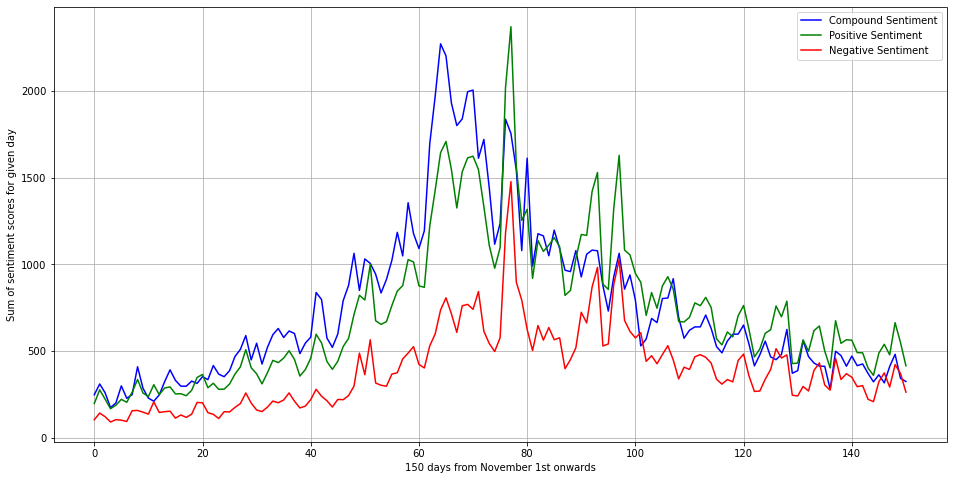

In [11]:
plt.figure(figsize=(16,8))

plt.plot(range(0,151,1),compound_sentiment_sum, c='blue', label='Compound Sentiment')
plt.plot(range(0,151,1),positive_sentiment_sum, c='green', label='Positive Sentiment')
plt.plot(range(0,151,1),negative_sentiment_sum, c='red', label='Negative Sentiment')
# plt.plot(range(0,151,1),neutral_sentiment_sum, c='black', label='Negative Sentiment')

plt.xlabel('150 days from November 1st onwards')
plt.ylabel('Sum of sentiment scores for given day')
# plt.fill_between(color='tab:gray', alpha=0.3)

plt.grid()
plt.legend()  
plt.show()

### Mean sentiment for the day

In [12]:
compound_sentiment_mean = df_small.groupby([pd.Grouper(key='date',freq='D')])['Compound Sentiment Score'].mean()
positive_sentiment_mean = df_small.groupby([pd.Grouper(key='date',freq='D')])['Positive Sentiment Score'].mean()
negative_sentiment_mean = df_small.groupby([pd.Grouper(key='date',freq='D')])['Negative Sentiment Score'].mean()
neutral_sentiment_mean = df_small.groupby([pd.Grouper(key='date',freq='D')])['Neutral Sentiment Score'].mean()

min(compound_sentiment_mean), max(compound_sentiment_mean)

(0.06072196153846155, 0.17185344153304674)

### distinct uptick in negative sentiment at around day 80-90 shown below

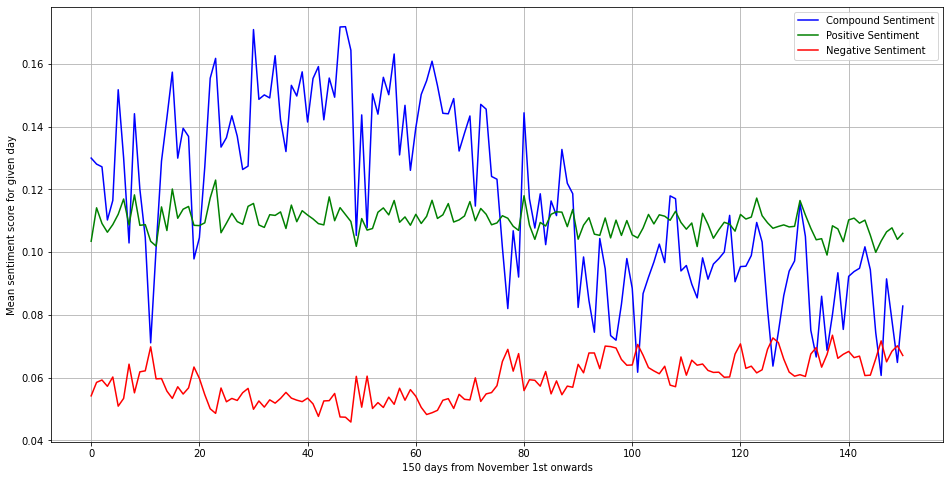

In [13]:
plt.figure(figsize=(16,8))

plt.plot(range(0,151,1),compound_sentiment_mean , c='blue', label='Compound Sentiment')
plt.plot(range(0,151,1),positive_sentiment_mean , c='green', label='Positive Sentiment')
plt.plot(range(0,151,1),negative_sentiment_mean , c='red', label='Negative Sentiment')

# Vader classifying much of the text as neutral, therefore commented this out as it doesnt give us much and skews the plot
# plt.plot(range(0,151,1),neutral_sentiment_sum, c='black', label='Negative Sentiment')

plt.xlabel('150 days from November 1st onwards')
plt.ylabel('Mean sentiment score for given day')

plt.grid()
plt.legend()  
plt.show()

### Using reddit's score/ upvote downvote feature to explore if it is informative in our project : not that useful

It is a feature that is essentially used to judge the quality of the post or comment, contributions that are usually

judges to be 'good' (useful, informative, funny, ect...) by other users tend to get higher scores, but this is prone bots therefore may not be the best metric on it's own

In [14]:
# reddit_scores = df_small.groupby([pd.Grouper(key='date',freq='D')])['score'].sum()
# reddit_scores_mean = df_small.groupby([pd.Grouper(key='date',freq='D')])['score'].mean()

In [15]:
# plt.figure(figsize=(16,8))

# plt.plot(range(0,151,1),reddit_scores , c='red', label='Sum of Score')

# plt.xlabel('150 days from November 1st onwards')
# plt.ylabel('Summative Score for given day')

# plt.grid()
# plt.legend()  
# plt.show()

In [16]:
# plt.figure(figsize=(16,8))

# plt.plot(range(0,151,1),reddit_scores_mean , c='green', label='Mean Score')

# plt.xlabel('150 days from November 1st onwards')
# plt.ylabel('Mean Score for given day')

# plt.grid()
# plt.legend()  
# plt.show()


### Bitcoin Specific sentiment

We can see if sentiment with the word 'Bitcoin' diviates from the
previously found sentiment

WARNING: very naive approach - to be expanded

In [17]:
import re
df_small_bitcoin = df_small.copy()
df_small_bitcoin = df_small_bitcoin[df_small_bitcoin['body'].str.contains(r'bitcoin')]
df_small_bitcoin

def get_sentiment_scores(df,data_column):
    df['Compound Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'compound'))
    df['Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df['Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    df['Neutral Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neu'))
    return df

get_sentiment_scores(df_small_bitcoin, 'body')

# df_small_bitcoin
compound_sentiment_sum_bitcoin = df_small_bitcoin.groupby([pd.Grouper(key='date',freq='D')])['Compound Sentiment Score'].sum()
positive_sentiment_sum_bitcoin = df_small_bitcoin.groupby([pd.Grouper(key='date',freq='D')])['Positive Sentiment Score'].sum()
negative_sentiment_sum_bitcoin = df_small_bitcoin.groupby([pd.Grouper(key='date',freq='D')])['Negative Sentiment Score'].sum()
neutral_sentiment_sum_bitcoin = df_small_bitcoin.groupby([pd.Grouper(key='date',freq='D')])['Neutral Sentiment Score'].sum()
# # dates = df_small.groupby([pd.Grouper(key = 'date', freq='D')])[df_small['date']]
# # print('compound \n ' +compound_sentiment.to_string()),print('positive \n ' + positive_sentiment.to_string())
# max(compound_sentiment_sum), min(compound_sentiment_sum)
# # dates

In [18]:
df_small_bitcoin
# df_small

,author,body,created_utc,score,date,optimized_body,Compound Sentiment Score,Positive Sentiment Score,Negative Sentiment Score,Neutral Sentiment Score
77044,mobilemanatwork,&gt; Bitcoin Cash WILL ALWAYS put pressure on ...,1510864988,1.0,2017-11-16 20:43:08,&gt; bitcoin cash will alway put pressur on bi...,0.9837,0.446,0.091,0.463
104661,5e84d5539181a3fd3287,I've read the white paper. It never said bitco...,1511285441,1.0,2017-11-21 17:30:41,i'v read the white paper. it never said bitcoi...,0.1700,0.080,0.037,0.882
1493636,Honey148,"Cnbc biggest enemy of bitcoin,\nDont come to t...",1518029807,1.0,2018-02-07 18:56:47,"cnbc biggest enemi of bitcoin, dont come to th...",-0.8885,0.000,0.225,0.775
1984300,MysticStryker,Well said. Most people who get into Bitcoin an...,1521086054,1.0,2018-03-15 03:54:14,well said. most peopl who get into bitcoin and...,0.6908,0.144,0.000,0.856
10950,saucesacla,1) Just buy from a reputable exchange like Kra...,1509698564,1.0,2017-11-03 08:42:44,1) just buy from a reput exchang like kraken o...,0.9868,0.167,0.021,0.813
...,...,...,...,...,...,...,...,...,...,...
1193459,Yintrovert,https://www.cnbc.com/2018/01/25/stock-trading-...,1516899778,1.0,2018-01-25 17:02:58,https://www.cnbc.com/2018/01/25/stock-trading-...,0.0000,0.000,0.000,1.000
1632981,Brenno365,Baby boomers starting to find out what bitcoin...,1518720434,1.0,2018-02-15 18:47:14,babi boomer start to find out what bitcoin is😂,0.4404,0.215,0.107,0.678
2158979,LtGuile,I’m so glad all the idiots putting their money...,1522526301,1.0,2018-03-31 19:58:21,i’m so glad all the idiot put their money in b...,0.1513,0.097,0.079,0.824
1926680,timkug,Well said. This is what scares me. I have se...,1520613903,1.0,2018-03-09 16:45:03,well said. thi is what scare me. i have seen t...,-0.0772,0.058,0.066,0.877


In [19]:
compound_sentiment_sum_bitcoin = df_small_bitcoin.groupby([pd.Grouper(key='date',freq='D')])['Compound Sentiment Score'].sum()
positive_sentiment_sum_bitcoin = df_small_bitcoin.groupby([pd.Grouper(key='date',freq='D')])['Positive Sentiment Score'].sum()
negative_sentiment_sum_bitcoin = df_small_bitcoin.groupby([pd.Grouper(key='date',freq='D')])['Negative Sentiment Score'].sum()
neutral_sentiment_sum_bitcoin = df_small_bitcoin.groupby([pd.Grouper(key='date',freq='D')])['Neutral Sentiment Score'].sum()

compound_sentiment_sum_bitcoin


date
2017-11-01    16.8399
2017-11-02    23.3210
2017-11-03    13.1865
2017-11-04     8.8556
2017-11-05    29.9288
               ...   
2018-03-27    13.6005
2018-03-28     8.8048
2018-03-29    10.0172
2018-03-30    11.2459
2018-03-31     8.4822
Freq: D, Name: Compound Sentiment Score, Length: 151, dtype: float64

### Below we can see a clear uptick in negative sentiment at around day 80-90 with the compound sentiment being lower after, suggesting euphoria in the market is ending

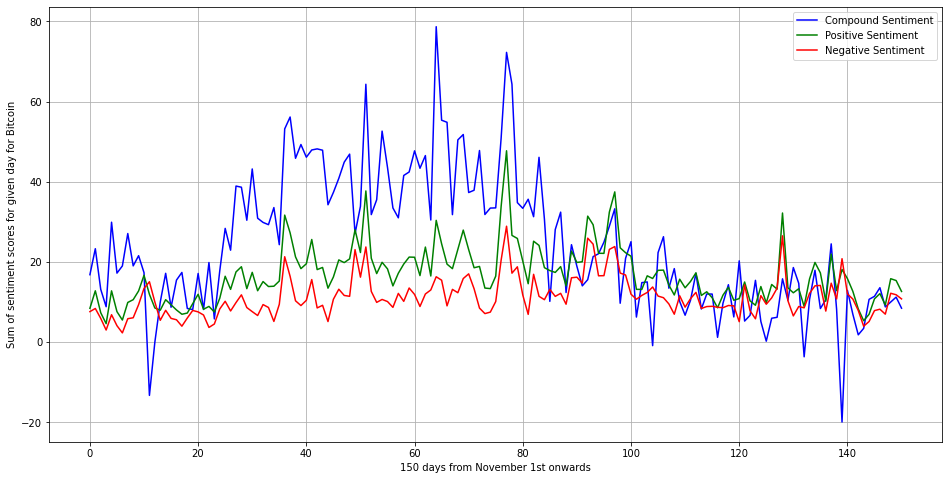

In [20]:
plt.figure(figsize=(16,8))

plt.plot(range(0,151,1),compound_sentiment_sum_bitcoin, c='blue', label='Compound Sentiment')
plt.plot(range(0,151,1),positive_sentiment_sum_bitcoin, c='green', label='Positive Sentiment')
plt.plot(range(0,151,1),negative_sentiment_sum_bitcoin, c='red', label='Negative Sentiment')
# plt.plot(range(0,151,1),neutral_sentiment_sum, c='black', label='Negative Sentiment')

plt.xlabel('150 days from November 1st onwards')
plt.ylabel('Sum of sentiment scores for given day for Bitcoin')
# plt.fill_between(color='tab:gray', alpha=0.3)

plt.grid()
plt.legend()  
plt.show()

#plot looks erratic with no structure at small sample sizes


### Lets start with the financial data
### Please use the coin_Bitcoin.csv file from the following link https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

Leaving h-m-s in datetime as for later work may increase the scope
to look into changing sentiment per hour

In [21]:
######### for kaggle

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
# data = pd.read_csv("../input/cryptocurrencypricehistory/coin_Bitcoin.csv")
# data.info()


######## local

df_financial = pd.read_csv('coin_bitcoin.csv')
df_financial



,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [22]:
price = df_financial['Close']
price_bubble_2017 = price[1647:1798]

date = df_financial['Date']
date_bubble_2017 = date[1647:1797]

date_bubble_2017

1647    2017-11-01 23:59:59
1648    2017-11-02 23:59:59
1649    2017-11-03 23:59:59
1650    2017-11-04 23:59:59
1651    2017-11-05 23:59:59
               ...         
1792    2018-03-26 23:59:59
1793    2018-03-27 23:59:59
1794    2018-03-28 23:59:59
1795    2018-03-29 23:59:59
1796    2018-03-30 23:59:59
Name: Date, Length: 150, dtype: object

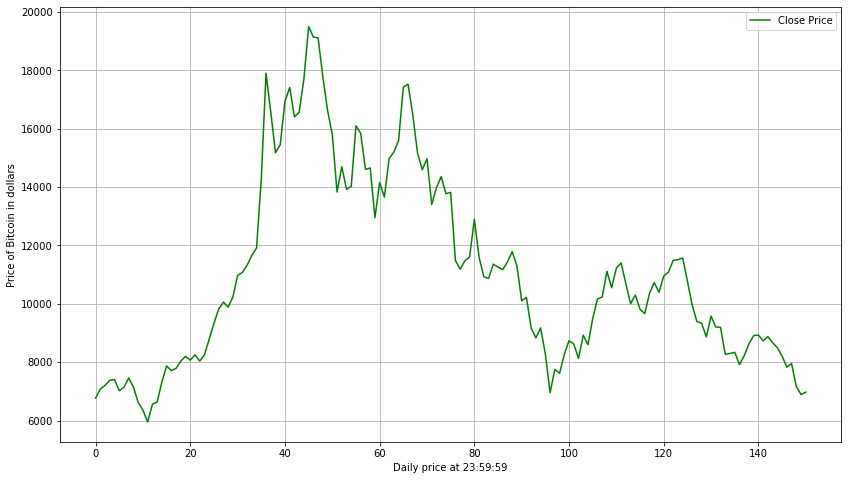

In [23]:
plt.figure(figsize=(14,8))

x = range(0,len(price_bubble_2017))
y = price_bubble_2017

# plt.plot(range(0,151,1),compound_sentiment, c='black', label='Compound Sentiment')
plt.plot(x, y, c='green', label = 'Close Price')
# plt.plot(range(0,151,1),neutral_sentiment, c='blue', label='Neutral Sentiment')
# plt.plot(range(0,151,1),negative_sentiment, c='red', label='Negative Sentiment')
# plt.xticks(rotation=45)
plt.ylabel('Price of Bitcoin in dollars')
plt.xlabel('Daily price at 23:59:59')

plt.grid()
plt.legend()  
plt.show()



In [24]:
df_financial_copy = df_financial.copy()

df_financial_bubble = df_financial_copy[1645:1800]

df_financial_bubble
# pd.set_option(display.max_rows,10)
df_financial_bubble
# for price in 

# price_change = 

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
1645,1646,Bitcoin,BTC,2017-10-30 23:59:59,6214.990234,6040.850098,6114.850098,6130.529785,1.772150e+09,1.021054e+11
1646,1647,Bitcoin,BTC,2017-10-31 23:59:59,6470.430176,6103.330078,6132.020020,6468.399902,2.311380e+09,1.077437e+11
1647,1648,Bitcoin,BTC,2017-11-01 23:59:59,6767.310059,6377.879883,6440.970215,6767.310059,2.870320e+09,1.127353e+11
1648,1649,Bitcoin,BTC,2017-11-02 23:59:59,7367.330078,6758.720215,6777.770020,7078.500000,4.653770e+09,1.179334e+11
1649,1650,Bitcoin,BTC,2017-11-03 23:59:59,7461.290039,7002.939941,7087.529785,7207.759766,3.369860e+09,1.200974e+11
...,...,...,...,...,...,...,...,...,...,...
1795,1796,Bitcoin,BTC,2018-03-29 23:59:59,7994.330078,7081.379883,7979.069824,7165.700195,6.361230e+09,1.214360e+11
1796,1797,Bitcoin,BTC,2018-03-30 23:59:59,7276.660156,6683.930176,7171.450195,6890.520020,6.289510e+09,1.167866e+11
1797,1798,Bitcoin,BTC,2018-03-31 23:59:59,7207.850098,6863.520020,6892.479980,6973.529785,4.553270e+09,1.182046e+11
1798,1799,Bitcoin,BTC,2018-04-01 23:59:59,7060.950195,6526.870117,7003.060059,6844.229980,4.532100e+09,1.160268e+11


### Rescaling data between 0-1 Financial

In [25]:
# pd.Series.values(price_bubble)
price_values = price_bubble_2017.values
# for i in range(0,len(price_values)):
#     print(price_values[i])
    
    
min_price = min(price_values)
max_price = max(price_values)

normalised_price_list = []


for i in range(0,len(price_values)):
    z_i = (price_values[i]-min_price)/(max_price-min_price)
    normalised_price_list.append(z_i)
    
normalised_price_list

[0.06032481678726707,
 0.08329538946805169,
 0.09283673526982386,
 0.10554702006308683,
 0.10757398477048043,
 0.07918090845632966,
 0.08815833146902896,
 0.11143303175394224,
 0.08809929366201749,
 0.049313797225605124,
 0.030081961271991538,
 0.0,
 0.044984538257850544,
 0.0506136742157568,
 0.10079256633995115,
 0.1418449271439942,
 0.1298352027016969,
 0.13582602632343715,
 0.1540097069255853,
 0.166126441898418,
 0.15657622961280895,
 0.17003201990071484,
 0.15417798990540002,
 0.1700424001744751,
 0.20969814560373962,
 0.24953107653927295,
 0.28553815574180696,
 0.30328705425239266,
 0.29072447210451,
 0.316189950792096,
 0.3709608886062187,
 0.37826860133343987,
 0.39661912321071385,
 0.42127342675507634,
 0.4404284919340047,
 0.6157250046341796,
 0.8820652405251799,
 0.783868859946427,
 0.6811770278919037,
 0.70163863794517,
 0.8109886226793195,
 0.8463165868881356,
 0.7719697502963875,
 0.7834702285999393,
 0.867833741029398,
 1.0,
 0.9736774999600828,
 0.9717138981737674,
 0.

No handles with labels found to put in legend.


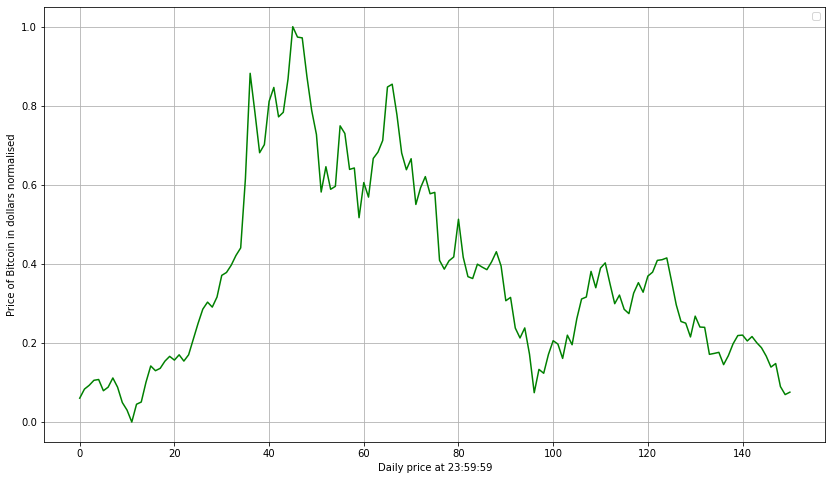

In [26]:
plt.figure(figsize=(14,8))

plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green')
plt.ylabel('Price of Bitcoin in dollars normalised')
plt.xlabel('Daily price at 23:59:59')

plt.grid()
plt.legend()  
plt.show()

### Normalising sentiment for visual comparison

In [27]:
max(compound_sentiment_sum), min(compound_sentiment_sum)
compound_values = compound_sentiment_sum.values
positive_values = positive_sentiment_sum.values
negative_values = negative_sentiment_sum.values

#compound min and max value
min_sent_comp = min(compound_values)
max_sent_comp = max(compound_values)
#positive min and max value
min_sent_pos = min(positive_values)
max_sent_pos = max(positive_values)
#negative min and max value
min_sent_neg = min(negative_values)
max_sent_neg = max(negative_values)

#containers for plotting to append normalised values
norm_comp_list = []
norm_pos_list = []
norm_neg_list = []

for i in range(0,len(compound_values)):
    z_i = (compound_values[i]-min_sent_comp)/(max_sent_comp-min_sent_comp)
    z_j = (positive_values[i]-min_sent_pos)/(max_sent_pos-min_sent_pos)
    z_k = (negative_values[i]-min_sent_neg)/(max_sent_neg-min_sent_neg)

    norm_comp_list.append(z_i)
    norm_pos_list.append(z_j)
    norm_neg_list.append(z_k)
    
norm_comp_list
norm_pos_list
norm_neg_list   


[0.009580265345105048,
 0.037207831088739214,
 0.02221344767781596,
 0.0,
 0.009987368979279498,
 0.007583656194135863,
 0.0024202851454729313,
 0.047124587402267895,
 0.048113885260182336,
 0.04100290160413232,
 0.03286226999545334,
 0.08385542272848794,
 0.03981113273523944,
 0.042889989069447305,
 0.0453009072286474,
 0.016124186062933317,
 0.029310741123159234,
 0.01933490074236973,
 0.032759233146450045,
 0.08141424199825222,
 0.08012087735516685,
 0.03885425906057766,
 0.03191836599409305,
 0.014708330060892644,
 0.04295699904817003,
 0.04203182901935581,
 0.060821282945672066,
 0.07669760414107249,
 0.12079953712677019,
 0.07882246895024168,
 0.05005285141870204,
 0.043514695000118835,
 0.06191361765258997,
 0.0872397869226786,
 0.08017779981021005,
 0.0917676439795853,
 0.12108919316382916,
 0.08653654241479458,
 0.0585768089271704,
 0.06599762366763597,
 0.09328077253138436,
 0.13610951592135448,
 0.1073679993486335,
 0.08842290934270391,
 0.06251598692368676,
 0.0938629667551

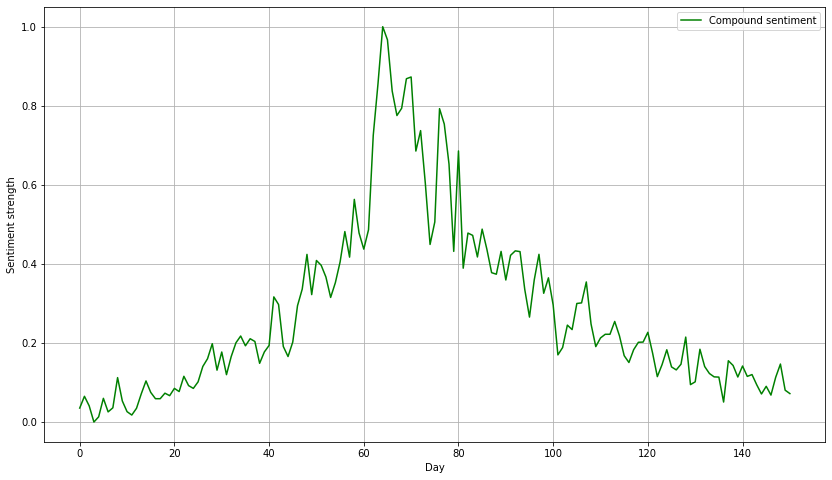

In [28]:
plt.figure(figsize=(14,8))

plt.plot(range(0,len(norm_comp_list),1), norm_comp_list, c='green', label = 'Compound sentiment')
plt.ylabel('Sentiment strength')
plt.xlabel('Day')

plt.grid()
plt.legend()  
plt.show()

### The following graph shows a discreptency of sentiment and price action.

Between december 1st and 31st there appears a clear divergence of sentiment and price, we will discuss this in the report as this needs further analysis, in short, bubbles are speculative and even people who consider themselves 'in the know' such as redditors who discuss cryptocurrencies, are fooled by them. 

Wisdom of the crowds may answer questions such as 'what is the capital of norway' with great effect, but speculating on unknown financial seems to leave most blindsided.

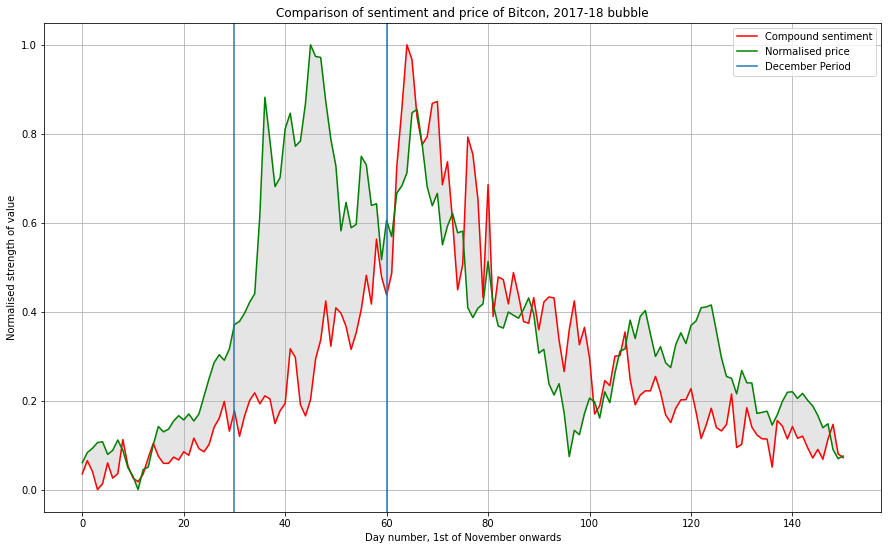

In [29]:
plt.figure(figsize=(15,9))
norm_comp_list
norm_pos_list
norm_neg_list   

plt.plot(range(0,len(normalised_price_list),1), norm_comp_list, c='red', label='Compound sentiment')
# plt.plot(range(0,len(normalised_price_list),1), norm_pos_list, c='orange')
# plt.plot(range(0,len(normalised_price_list),1), norm_neg_list, c='blue')
plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green', label = 'Normalised price')
plt.fill_between(range(0,len(normalised_price_list),1),norm_comp_list, normalised_price_list, color='tab:gray', alpha=0.2)


plt.axvline(x=30, label = 'December Period')
plt.axvline(x=60)

# plt.vlines(x=35, colors='blue', linestyles='solid', label='', *, data=None, **kwargs)

plt.xlabel('Day number, 1st of November onwards')
plt.ylabel('Normalised strength of value')
plt.title('Comparison of sentiment and price of Bitcon, 2017-18 bubble')

plt.grid()
plt.legend()  
plt.show()


# Sentiment and stock market indicators

Here is the graph showing broad crypto sentiment with price, giving the pearson score

No handles with labels found to put in legend.


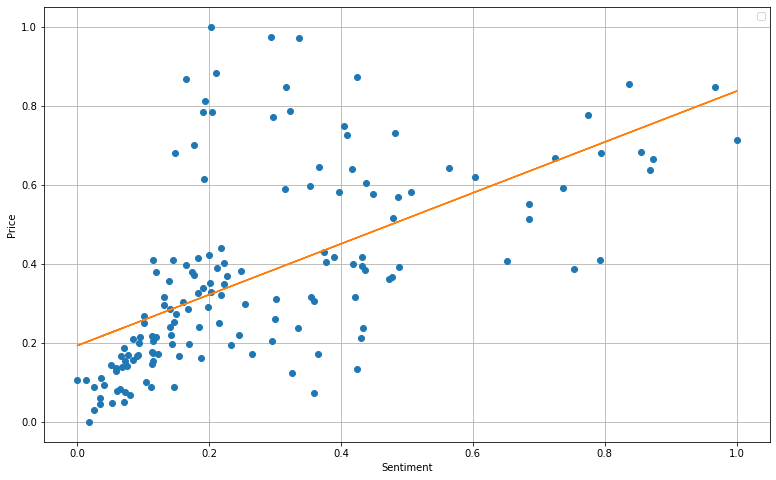

SpearmanrResult(correlation=0.7151934471941442, pvalue=5.995002514570513e-25)

In [30]:
plt.figure(figsize=(13,8))
x = np.array(norm_comp_list)
y = np.array(normalised_price_list)
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, 'o')
plt.plot(x, m*x +b)

# plt.scatter(normalised_sent_list,normalised_price_list, c='green')
plt.xlabel('Sentiment')
plt.ylabel('Price')

plt.grid()
plt.legend()  
plt.show()
stats.spearmanr(norm_comp_list, normalised_price_list)

#stronger sentiment seems to track higher prices, but between sentiment 0.2 to 0.3, where the price is 0.8-1.0, we see
#the sentiment formed around the peak of the bubble suggesting that retail investors were not aware of this bubble forming

In [31]:
#one problem we face is we are not comparing things in the same realm, if we were comparing diseases or have something
#that at the very least had the same unit of measurment we would be able to run some statistically reliable tests,
# as we do not have these things, it becomes harder to unwrap the meaning of results

#from below we can see we have a correlation, but a faily weak one, reasons for and against this result are beyond the score
#of this project, as they would require 2000 words on speculation behind the result alone

# pearson assumes normal distribution which the price does not seem to have 
# stats.pearsonr(norm_comp_list, normalised_price_list)
#spearman does not make this assumption
stats.spearmanr(norm_comp_list, normalised_price_list)

SpearmanrResult(correlation=0.7151934471941442, pvalue=5.995002514570513e-25)

### Normalising reddit scores and plotting

In [32]:
# reddit_score = reddit_scores.values
    
# min_score = min(reddit_score)
# max_score = max(reddit_score)

# reddit_score_list = []


# for i in range(0,len(reddit_score)):
#     z_i = (reddit_score[i]-min_score)/(max_score-min_score)
#     reddit_score_list.append(z_i)
    
# reddit_score_list

### reddit score seems to give us huge spikes in activity after large price drops, please note the 3 spikes between day 50 and 80

In [34]:
# plt.figure(figsize=(15,9))

# plt.plot(range(0,len(reddit_score_list)), reddit_score_list, c='black', label = 'reddit score normalised')

# # plt.plot(range(0,len(normalised_price_list),1), norm_comp_list, c='orange')
# # plt.plot(range(0,len(normalised_price_list),1), norm_pos_list, c='red')
# # plt.plot(range(0,len(normalised_sent_list),1), norm_neg_list, c='blue')
# plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green', label= 'price normalised')

# plt.xlabel('Day number')
# plt.ylabel('Normalised value of score and price')

# plt.grid()
# plt.legend()  
# plt.show()






### Change of price vs. change of sentiment
price change on low volume are vulnreble to trend reversals, therefore
if we find the price change occuring with low volume it may suggest that 
the classic financial argument of "reverting to the mean". Heavy price
movement on low volume can also suggest a few players being responsible for
the movement as they may have skin in the game.

In [35]:
# here we implement the calculation: price_n - price_n_-1 / price_n to work out the rate of change 
price_bubble = price_bubble_2017.values
change_rate = []

for i in range(1, len(price_bubble),1):
    change = ((price_bubble[i]-price_bubble[i-1])/(price_bubble[i-1]))*100
    change_rate.append(change)
    
change_rate
    

[4.598428898807031,
 1.826089787737515,
 2.3889590564422623,
 0.3720887026438425,
 -5.19277834642991,
 1.7317994812068904,
 4.413399955849256,
 -4.237573756606553,
 -7.355414731266848,
 -3.9367561532426967,
 -6.41012751946662,
 10.242239640209053,
 1.162586769705987,
 10.244358799871906,
 7.60230822843014,
 -2.0668967939835325,
 1.0527924605073773,
 3.1622027190662387,
 2.042551030055049,
 -1.5776803805438673,
 2.258507895370461,
 -2.602271631465391,
 2.6735484363164086,
 6.508961012823454,
 6.138491620992985,
 5.227985648203048,
 2.448987914250959,
 -1.6919459222728546,
 3.4887536827456067,
 7.250625667631688,
 0.9020008338809792,
 2.244781705038363,
 2.949696148075409,
 2.226091991663213,
 19.928333899191664,
 25.24716942763181,
 -7.431961911021986,
 -8.396201205323301,
 1.826304777546076,
 9.585001702858465,
 2.8257970059188326,
 -5.783393716386751,
 0.949530043930495,
 6.89990576325163,
 10.111877067699487,
 -1.828959770177695,
 -0.13897831550526576,
 -6.997415820004557,
 -6.480953

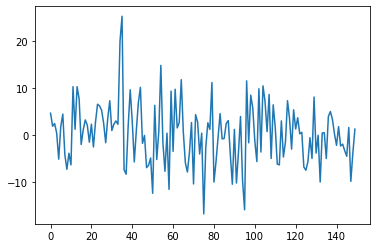

In [36]:
plt.plot(range(0,len(change_rate)),change_rate)

In [37]:
compound_values = compound_sentiment_sum.values
compound_values


sentiment_change = []

for i in range(1, len(compound_values),1):
    change = ((compound_values[i]-compound_values[i-1])/(compound_values[i-1]))*100
    sentiment_change.append(change)
    
sentiment_change

[25.29473436030231,
 -16.393971598758874,
 -33.2305300588396,
 15.979855840097896,
 49.07398714378725,
 -24.108810940588498,
 9.55828377383973,
 64.62051943635724,
 -30.364979081607267,
 -19.95165896832646,
 -7.89387834313989,
 17.166718070924645,
 31.12622901329814,
 21.308433659426164,
 -15.55317626247621,
 -10.169458156725975,
 -0.009069976724777742,
 9.8970514843738,
 -4.043002543982751,
 12.346404996771817,
 -4.790989261708164,
 24.245631122236038,
 -11.922450691354737,
 -4.022885828193189,
 9.86276891758955,
 21.169385290698447,
 8.846206888441468,
 15.659087288405823,
 -23.881918987149138,
 21.51371247174352,
 -22.09275294404526,
 22.705636924292218,
 14.022180126320984,
 6.067305682121046,
 -8.273354729059475,
 6.515126329786957,
 -2.372199767476211,
 -19.32851158307341,
 12.486805685990683,
 6.3330961407826125,
 44.506710690772515,
 -4.84235221288694,
 -27.95729825327114,
 -9.320129465306934,
 14.780218714204604,
 32.26336922380722,
 11.205371818527391,
 20.969621389563972,
 -

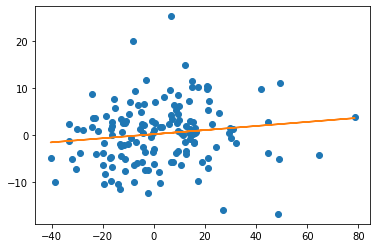

In [38]:
x = np.array(sentiment_change)
y = np.array(change_rate)
len(x), len(y)
m, b = np.polyfit(x, y, 1)
,
plt.plot(x, y, 'o')
plt.plot(x, m*x +b)

# plt.scatter(sentiment_change,change_rate)



# norm_neg_list = []

# for i in range(0,len(compound_values)):
#     z_i = (compound_values[i]-min_sent_comp)/(max_sent_comp-min_sent_comp)

### Rates of change with respect to eachother do not give us anything interesting in this form. I will need to look into this more.

In [39]:
compound_sentiment_sum_bitcoin

compound_sentiment_sum_bitcoin = compound_sentiment_sum_bitcoin.values
# for i in range(0,len(price_values)):
#     print(price_values[i])
    
    
min_score_bitcoin = min(compound_sentiment_sum_bitcoin)
max_score_bitcoin = max(compound_sentiment_sum_bitcoin)

compound_sentiment_sum_bitcoin_list = []


for i in range(0,len(compound_sentiment_sum_bitcoin)):
    z_i = (compound_sentiment_sum_bitcoin[i]-min_score_bitcoin)/(max_score_bitcoin-min_score_bitcoin)
    compound_sentiment_sum_bitcoin_list.append(z_i)
    
compound_sentiment_sum_bitcoin_list

[0.37267059958196314,
 0.4383993704090214,
 0.33561925161023387,
 0.2916969647183626,
 0.5054130828762007,
 0.3766552370752823,
 0.3948147990389814,
 0.47677216980701553,
 0.3949719939515456,
 0.42076007289787326,
 0.37781543694607816,
 0.06737779616789227,
 0.20175612071352297,
 0.30332026080157243,
 0.37616843992669663,
 0.29033900350595376,
 0.35901289708195555,
 0.37837221118477316,
 0.2872843513985785,
 0.28451772093744976,
 0.3757577048325774,
 0.28460392459917844,
 0.4034564625871038,
 0.2607985298726114,
 0.382644870324339,
 0.48978892272805186,
 0.4346743580616146,
 0.5968700971667396,
 0.5939401868286892,
 0.5104037678099304,
 0.640117967175674,
 0.5155273077987949,
 0.5049374414956033,
 0.4991993201066494,
 0.542465445008656,
 0.4485906715468083,
 0.7414579777432289,
 0.7715501548116354,
 0.6671392655650856,
 0.7019787289929286,
 0.6698430180611888,
 0.6881557182945471,
 0.6909122071484132,
 0.6875553351446249,
 0.5495544284849353,
 0.5807926071739703,
 0.6163835636999424,
 

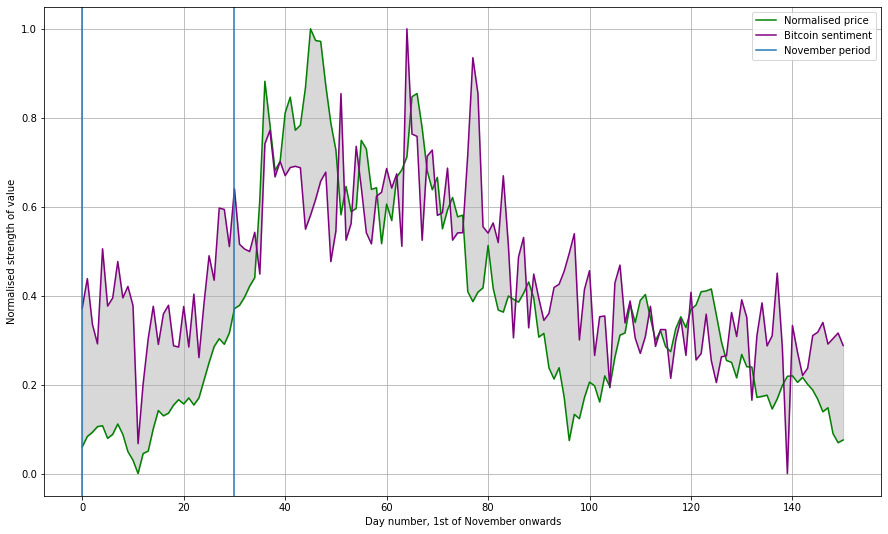

In [40]:
plt.figure(figsize=(15,9))
norm_comp_list
norm_pos_list
norm_neg_list   

# plt.plot(range(0,len(normalised_price_list),1), norm_comp_list, c='red', label='Compound sentiment')
# plt.plot(range(0,len(normalised_price_list),1), norm_pos_list, c='orange')
# plt.plot(range(0,len(normalised_price_list),1), norm_neg_list, c='blue')
plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green', label = 'Normalised price')
plt.plot(range(0,len(compound_sentiment_sum_bitcoin_list),1), compound_sentiment_sum_bitcoin_list, c='purple', label = 'Bitcoin sentiment')


#lag shown between price and sentiment by shading
plt.fill_between(range(0,len(normalised_price_list),1),normalised_price_list, compound_sentiment_sum_bitcoin_list, color='tab:gray', alpha=0.3)


plt.axvline(x=30, label = 'November period')
plt.axvline(x=0)

# plt.vlines(x=35, colors='blue', linestyles='solid', label='', *, data=None, **kwargs)

plt.xlabel('Day number, 1st of November onwards')
plt.ylabel('Normalised strength of value')


plt.grid()
plt.legend()  
plt.show()


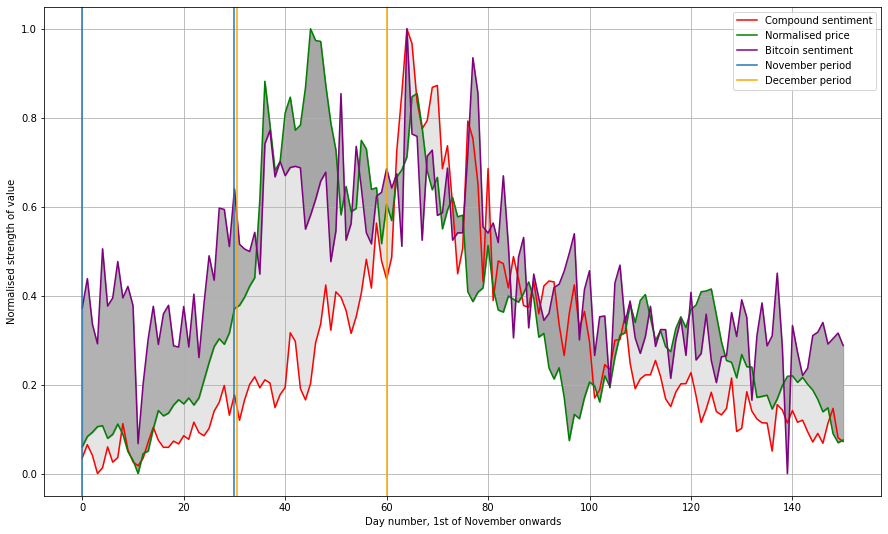

In [41]:
plt.figure(figsize=(15,9))
norm_comp_list
norm_pos_list
norm_neg_list   

plt.plot(range(0,len(normalised_price_list),1), norm_comp_list, c='red', label='Compound sentiment')
# plt.plot(range(0,len(normalised_price_list),1), norm_pos_list, c='orange')
# plt.plot(range(0,len(normalised_price_list),1), norm_neg_list, c='blue')
plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green', label = 'Normalised price')
plt.plot(range(0,len(compound_sentiment_sum_bitcoin_list),1), compound_sentiment_sum_bitcoin_list, c='purple', label = 'Bitcoin sentiment')


#lag shown between price and sentiment by shading
plt.fill_between(range(0,len(normalised_price_list),1),normalised_price_list, compound_sentiment_sum_bitcoin_list, color='tab:gray', alpha=0.6)
plt.fill_between(range(0,len(normalised_price_list),1),normalised_price_list, norm_comp_list, color='tab:gray', alpha=0.2)


plt.axvline(x=30, label = 'November period')
plt.axvline(x=0)
plt.axvline(x=30.5, c='orange')

plt.axvline(x=60, c='orange', label = 'December period')


# plt.vlines(x=35, colors='blue', linestyles='solid', label='', *, data=None, **kwargs)

plt.xlabel('Day number, 1st of November onwards')
plt.ylabel('Normalised strength of value')


plt.grid()
plt.legend()  
plt.show()


No handles with labels found to put in legend.


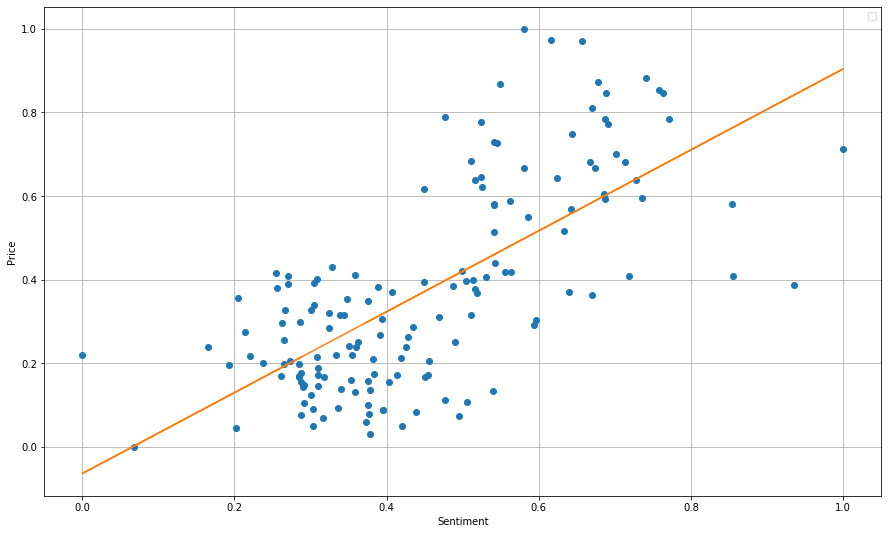

SpearmanrResult(correlation=0.658999651446497, pvalue=3.6378614582304436e-20)

In [42]:
stats.spearmanr(compound_sentiment_sum_bitcoin_list, normalised_price_list)
plt.figure(figsize=(15,9))

x = np.array(compound_sentiment_sum_bitcoin_list)
y = np.array(normalised_price_list)


len(x), len(y)
m, b = np.polyfit(x, y, 1)

plt.xlabel('Sentiment')
plt.ylabel('Price')

plt.plot(x, y, 'o')
plt.plot(x, m*x +b)


plt.grid()
plt.legend()  
plt.show()

# stats.pearsonr(compound_sentiment_sum_bitcoin_list, normalised_price_list)
stats.spearmanr(compound_sentiment_sum_bitcoin_list, normalised_price_list)

# bollinger bands start

In [43]:
import yfinance as yf
import ta
from ta import add_all_ta_features
import pandas as pd
import matplotlib.pyplot as plt

from ta.utils import dropna
from ta.volatility import BollingerBands

In [44]:
df_financial

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [45]:
df_financial = add_all_ta_features(df_financial, open="Open", high="High", low="Low", close="Close", volume="Volume")

C:\Users\filip\Coding\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\filip\Coding\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [46]:
df_f = df_financial[1647:1798]
df = df_f.copy()

In [47]:
# used for price volatility/ 2 sigma away from SMA
# could work in tandem with 
# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df_f["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

# Add Width Size Bollinger Bands
df['bb_bbw'] = indicator_bb.bollinger_wband()

# Add Percentage Bollinger Bands
df['bb_bbp'] = indicator_bb.bollinger_pband()

In [48]:
# print(df.columns)
# df

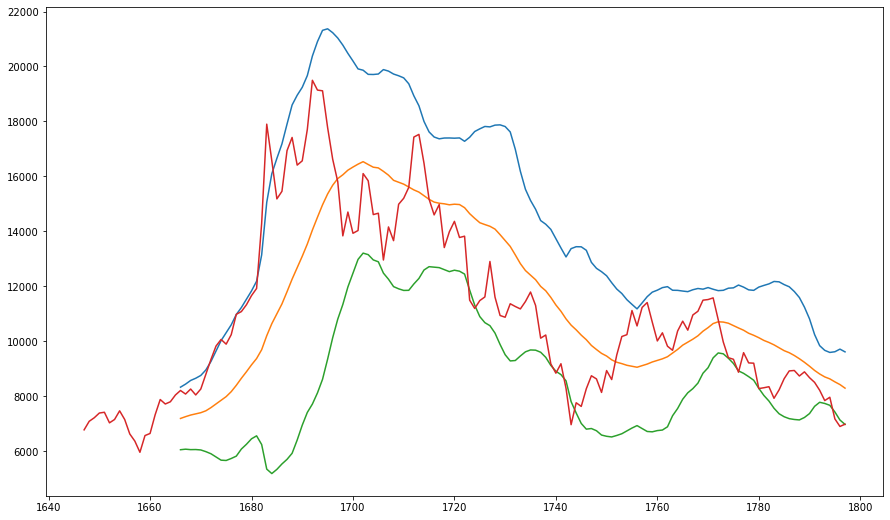

In [49]:
plt.figure(figsize=(15,9))

plt.plot(df['bb_bbh'])
plt.plot(df['bb_bbm'])
plt.plot(df['bb_bbl'])
plt.plot(price_bubble_2017)
plt.plot()
plt.show()

# start of emotions of text 

In [50]:
import text2emotion as te


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
emotions = []
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for text in tqdm(df_small_bitcoin.body):
    emotions.append(te.get_emotion(str(text)))

<ipython-input-51-6e3310fa610a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

<ipython-input-51-6e3310fa610a>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for text in tqdm(df_small_bitcoin.body):


  0%|          | 0/26163 [00:00<?, ?it/s]

In [52]:
data = df_small_bitcoin.copy()

emotion_data = pd.DataFrame.from_dict(emotions)

# datas = pd.DataFrame()

happy = emotion_data.Happy
angry = emotion_data.Angry
surprise = emotion_data.Surprise
sad = emotion_data.Sad
fear = emotion_data.Fear

# datas['happy']

happy = happy.values
angry = angry.values
surprise = surprise.values
sad = sad.values
fear = fear.values

#insering into mini-dataframe

data.insert(loc=1, column='happy', value=happy)
data.insert(loc=1, column='angry', value=angry)
data.insert(loc=1, column='surprise', value=surprise)
data.insert(loc=1, column='sad', value=sad)
data.insert(loc=1, column='fear', value=fear)


# pd.concat([df_small_bitcoin,data], axis=1, join="inner")

In [53]:
data

,author,fear,sad,surprise,angry,happy,body,created_utc,score,date,optimized_body,Compound Sentiment Score,Positive Sentiment Score,Negative Sentiment Score,Neutral Sentiment Score
77044,mobilemanatwork,0.11,0.22,0.00,0.00,0.67,&gt; Bitcoin Cash WILL ALWAYS put pressure on ...,1510864988,1.0,2017-11-16 20:43:08,&gt; bitcoin cash will alway put pressur on bi...,0.9837,0.446,0.091,0.463
104661,5e84d5539181a3fd3287,0.20,0.60,0.20,0.00,0.00,I've read the white paper. It never said bitco...,1511285441,1.0,2017-11-21 17:30:41,i'v read the white paper. it never said bitcoi...,0.1700,0.080,0.037,0.882
1493636,Honey148,0.29,0.14,0.43,0.14,0.00,"Cnbc biggest enemy of bitcoin,\nDont come to t...",1518029807,1.0,2018-02-07 18:56:47,"cnbc biggest enemi of bitcoin, dont come to th...",-0.8885,0.000,0.225,0.775
1984300,MysticStryker,0.40,0.00,0.20,0.00,0.40,Well said. Most people who get into Bitcoin an...,1521086054,1.0,2018-03-15 03:54:14,well said. most peopl who get into bitcoin and...,0.6908,0.144,0.000,0.856
10950,saucesacla,0.35,0.20,0.30,0.05,0.10,1) Just buy from a reputable exchange like Kra...,1509698564,1.0,2017-11-03 08:42:44,1) just buy from a reput exchang like kraken o...,0.9868,0.167,0.021,0.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193459,Yintrovert,0.00,0.00,0.00,0.00,0.00,https://www.cnbc.com/2018/01/25/stock-trading-...,1516899778,1.0,2018-01-25 17:02:58,https://www.cnbc.com/2018/01/25/stock-trading-...,0.0000,0.000,0.000,1.000
1632981,Brenno365,0.00,0.00,0.00,0.00,0.00,Baby boomers starting to find out what bitcoin...,1518720434,1.0,2018-02-15 18:47:14,babi boomer start to find out what bitcoin is😂,0.4404,0.215,0.107,0.678
2158979,LtGuile,0.00,0.67,0.00,0.00,0.33,I’m so glad all the idiots putting their money...,1522526301,1.0,2018-03-31 19:58:21,i’m so glad all the idiot put their money in b...,0.1513,0.097,0.079,0.824
1926680,timkug,0.00,0.33,0.67,0.00,0.00,Well said. This is what scares me. I have se...,1520613903,1.0,2018-03-09 16:45:03,well said. thi is what scare me. i have seen t...,-0.0772,0.058,0.066,0.877


In [54]:
happy_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['happy'].mean()
sad_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['sad'].mean()
surprise_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['surprise'].mean()
angry_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['angry'].mean()
fear_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['fear'].mean()

In [55]:
happy_bitcoin

date
2017-11-01    0.093429
2017-11-02    0.095397
2017-11-03    0.089348
2017-11-04    0.095902
2017-11-05    0.089000
                ...   
2018-03-27    0.087197
2018-03-28    0.072286
2018-03-29    0.086407
2018-03-30    0.051630
2018-03-31    0.051898
Freq: D, Name: happy, Length: 151, dtype: float64

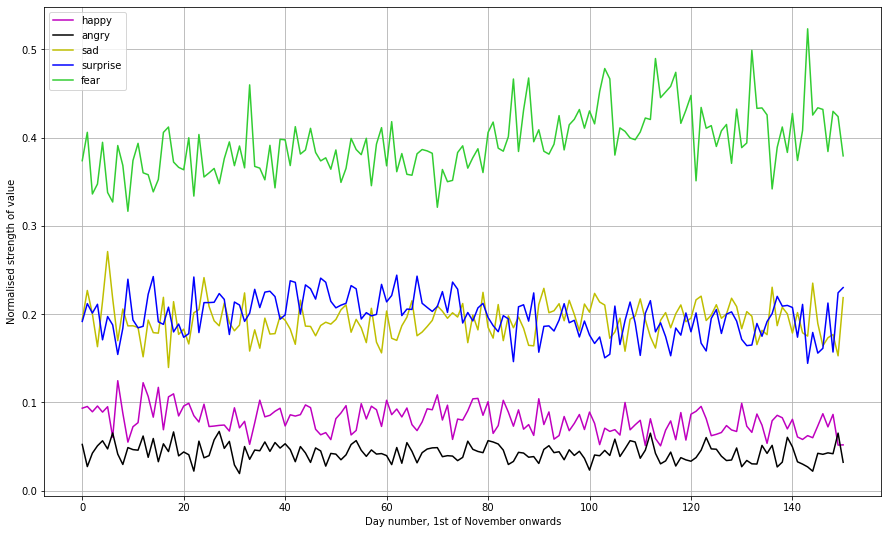

In [56]:
plt.figure(figsize=(15,9))


# plt.plot(range(0,len(normalised_price_list),1), norm_comp_list, c='red', label='Compound sentiment')
# plt.plot(range(0,len(normalised_price_list),1), norm_pos_list, c='orange')
# plt.plot(range(0,len(normalised_price_list),1), norm_neg_list, c='blue')
# plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green', label = 'Normalised price')
# plt.plot(range(0,len(compound_sentiment_sum_bitcoin_list),1), compound_sentiment_sum_bitcoin_list, c='purple', label = 'Bitcoin sentiment')
plt.plot(range(0,len(happy_bitcoin),1), happy_bitcoin, c='m', label = 'happy')
plt.plot(range(0,len(angry_bitcoin),1), angry_bitcoin, c='k', label = 'angry')
plt.plot(range(0,len(sad_bitcoin),1), sad_bitcoin, c='y', label = 'sad')
plt.plot(range(0,len(surprise_bitcoin),1), surprise_bitcoin, c='blue', label = 'surprise')
plt.plot(range(0,len(fear_bitcoin),1), fear_bitcoin, c='limegreen', label = 'fear')



#lag shown between price and sentiment by shading
# plt.fill_between(range(0,len(normalised_price_list),1),normalised_price_list, compound_sentiment_sum_bitcoin_list, color='tab:gray', alpha=0.3)


# plt.axvline(x=30, label = 'November period')
# plt.axvline(x=0)

# plt.vlines(x=35, colors='blue', linestyles='solid', label='', *, data=None, **kwargs)

plt.xlabel('Day number, 1st of November onwards')
plt.ylabel('Normalised strength of value')


plt.grid()
plt.legend()  
plt.show()

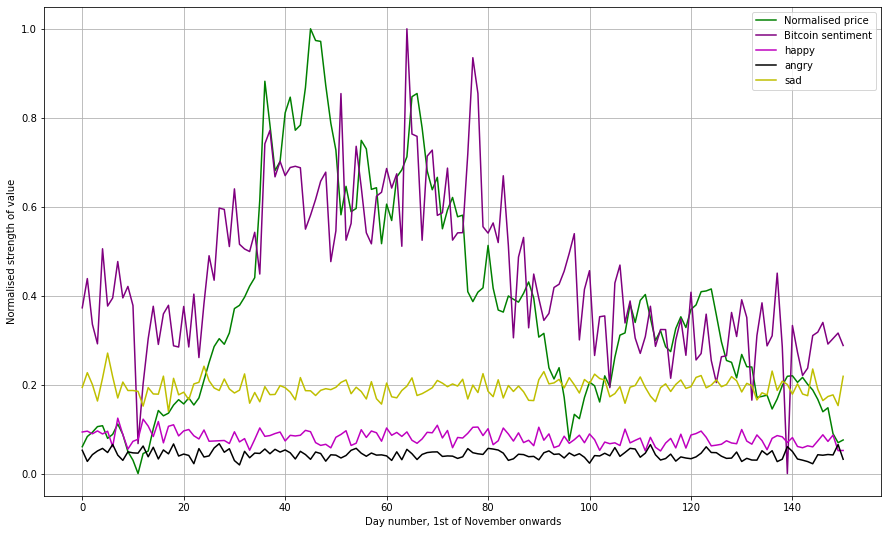

In [58]:
plt.figure(figsize=(15,9))


# plt.plot(range(0,len(normalised_price_list),1), norm_comp_list, c='red', label='Compound sentiment')
# plt.plot(range(0,len(normalised_price_list),1), norm_pos_list, c='orange')
# plt.plot(range(0,len(normalised_price_list),1), norm_neg_list, c='blue')
plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green', label = 'Normalised price')
plt.plot(range(0,len(compound_sentiment_sum_bitcoin_list),1), compound_sentiment_sum_bitcoin_list, c='purple', label = 'Bitcoin sentiment')
plt.plot(range(0,len(happy_bitcoin),1), happy_bitcoin, c='m', label = 'happy')
plt.plot(range(0,len(angry_bitcoin),1), angry_bitcoin, c='k', label = 'angry')
plt.plot(range(0,len(sad_bitcoin),1), sad_bitcoin, c='y', label = 'sad')
# plt.plot(range(0,len(surprise_bitcoin),1), surprise_bitcoin, c='blue', label = 'surprise')
# plt.plot(range(0,len(fear_bitcoin),1), fear_bitcoin, c='limegreen', label = 'fear')



#lag shown between price and sentiment by shading
# plt.fill_between(range(0,len(normalised_price_list),1),normalised_price_list, compound_sentiment_sum_bitcoin_list, color='tab:gray', alpha=0.3)


# plt.axvline(x=30, label = 'November period')
# plt.axvline(x=0)

# plt.vlines(x=35, colors='blue', linestyles='solid', label='', *, data=None, **kwargs)

plt.xlabel('Day number, 1st of November onwards')
plt.ylabel('Normalised strength of value')


plt.grid()
plt.legend()  
plt.show()

# Thank you for looking through my work, I hope it was somewhat interesting :)